In [0]:
import matplotlib
from jedi.refactoring import inline
from pandas_datareader import get_data_yahoo
start_date = '2017-01-01'
codes = ['005930.KS']
result = {}
for code in codes:
    result[code] = get_data_yahoo(code, start_date).Close


In [0]:
import pandas as pd
prices = pd.DataFrame(result)

In [0]:
prices = prices.fillna(method='ffill')
prices = prices.dropna()
prices.to_csv('stockss.csv', encoding="ms949")
prices.tail(3)

,005930.KS
Date,
2020-02-17,61500.0
2020-02-18,59800.0
2020-02-19,60200.0


In [0]:
prices = pd.read_csv('stockss.csv')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 759 entries, 2017-01-02 to 2020-02-19
Data columns (total 1 columns):
005930.KS    759 non-null float64
dtypes: float64(1)
memory usage: 11.9 KB


In [0]:
price = prices['005930.KS']
price = price['2018-01-01':'2020-02-19']
price.tail()

Date
2020-02-13    60700.0
2020-02-14    61800.0
2020-02-17    61500.0
2020-02-18    59800.0
2020-02-19    60200.0
Name: 005930.KS, dtype: float64

In [0]:
import warnings
warnings.filterwarnings('ignore')

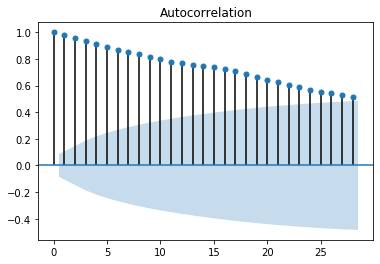

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(price)
plt.show()

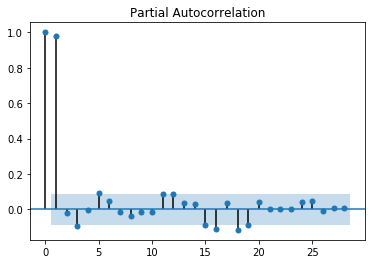

In [0]:
plot_pacf(price)
plt.show()

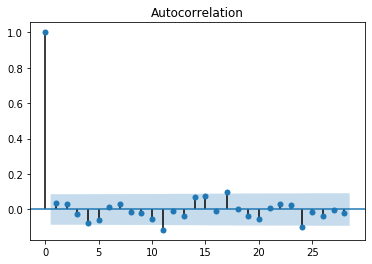

In [0]:
diff_1 = price.diff(periods=1).dropna()
plot_acf(diff_1)
plt.show()

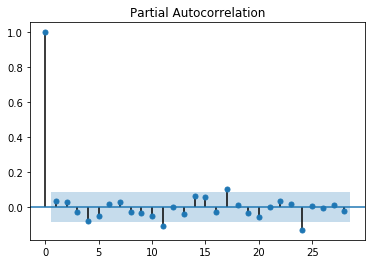

In [0]:
plot_pacf(diff_1)
plt.show()

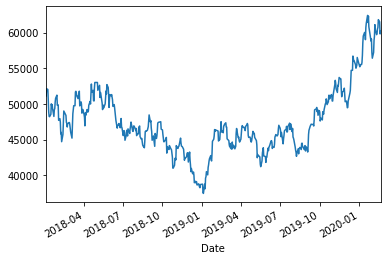

In [0]:
price.plot()

In [0]:
import statsmodels.tsa.api as tsa
ARMA = tsa.ARMA(price, order =(2, 1))
ARMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
ARMA_results= ARMA.fit()
ARMA_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: ARMA
=========================================================================
Model:                ARMA               BIC:                   8410.3324
Dependent Variable:   005930.KS          Log-Likelihood:        -4189.5  
Date:                 2020-02-19 07:37   Scale:                 1.0000   
No. Observations:     520                Method:                css-mle  
Df Model:             4                  Sample:                0        
Df Residuals:         516                                       0        
Converged:            1.0000             S.D. of innovations:   760.542  
No. Iterations:       42.0000            HQIC:                  8397.395 
AIC:                  8389.0633                                          
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           49310.5997 2908.5829 16.9535 0.0000 43609.8820 55011.3173
ar.L1.005930.KS     1.2929    0.4159  3.1086 0.0020     0.4777     2.1080
ar.L2.005930.KS    -0.3004    0.4121 -0.7290 0.4663    -1.1080     0.5072
ma.L1.005930.KS    -0.2556    0.4201 -0.6086 0.5431    -1.0789     0.5677
------------------------------------------------------------------------------------
                  Real             Imaginary            Modulus            Frequency
------------------------------------------------------------------------------------
AR.1             1.0109               0.0000             1.0109               0.0000
AR.2             3.2930               0.0000             3.2930               0.0000
MA.1             3.9117               0.0000             3.9117               0.0000
=========================================================================

"""

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA (price, order = (0, 0, 3))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              005930.KS   No. Observations:                  520
Model:                     ARMA(0, 3)   Log Likelihood               -4511.963
Method:                       css-mle   S.D. of innovations           1415.354
Date:                Wed, 19 Feb 2020   AIC                           9033.926
Time:                        07:37:27   BIC                           9055.195
Sample:                             0   HQIC                          9042.258
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.754e+04    265.232    179.245      0.000     4.7e+04    4.81e+04
ma.L1.005930.KS     1.4205      0.042     33.533      0.000       1.337       1.503
ma.L2.005930.KS     1.2472      0.038     32.715      0.000       1.172       1.322
ma.L3.005930.KS     0.6166      0.031     19.641      0.000       0.555       0.678
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2233           -0.0000j            1.2233           -0.5000
MA.2           -0.3997           -1.0798j            1.1514           -0.3064
MA.3           -0.3997           +1.0798j            1.1514            0.3064
-----------------------------------------------------------------------------
"""

In [0]:

model = ARIMA(price, order = (0,0,3))
model_fit = model.fit(trend = 'c', full_output = True, disp = 1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              005930.KS   No. Observations:                  520
Model:                     ARMA(0, 3)   Log Likelihood               -4511.963
Method:                       css-mle   S.D. of innovations           1415.354
Date:                Wed, 19 Feb 2020   AIC                           9033.926
Time:                        07:37:27   BIC                           9055.195
Sample:                             0   HQIC                          9042.258
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.754e+04    265.232    179.245      0.000     4.7e+04    4.81e+04
ma.L1.005930.KS     1.4205      0.042     33.533      0.000       1.337       1.503
ma.L2.005930.KS     1.2472      

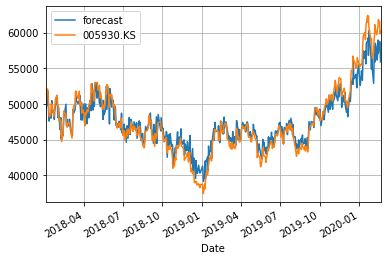

In [0]:
model_fit.plot_predict()
plt.grid()
plt.show()

In [0]:
fore = model_fit.forecast(steps = 10)
len(fore)

3

In [0]:
fore[0]

array([57141.39919865, 53803.28493756, 50206.38135522, 47541.61321099,
       47541.61321099, 47541.61321099, 47541.61321099, 47541.61321099,
       47541.61321099, 47541.61321099])

In [0]:
fore[1]

array([1415.35353659, 2458.70363816, 3026.76328033, 3150.05775018,
       3150.05775018, 3150.05775018, 3150.05775018, 3150.05775018,
       3150.05775018, 3150.05775018])

In [0]:
fore[2].shape

(10, 2)

예측주가 : [57141.39919865 53803.28493756 50206.38135522 47541.61321099
 47541.61321099 47541.61321099 47541.61321099 47541.61321099
 47541.61321099 47541.61321099] 
stderr : 1415.3535365938592 
upper bound : 54367.35724153174 
lower bound : 59915.44115576245


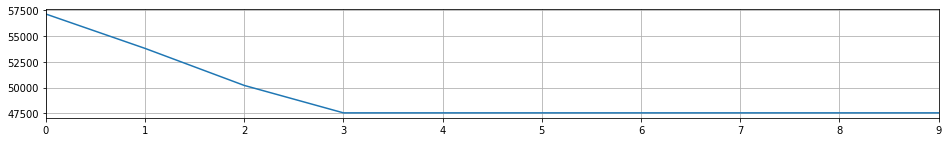

In [0]:
print('예측주가 : {} \nstderr : {} \nupper bound : {} \nlower bound : {}'.format(
    fore[0], 
    fore[1][0], 
    fore[2][0][0], 
    fore[2][0][1]))

pd.Series(fore[0]).plot(figsize=(16,2), grid=True)